# Conducción estacionaria

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019**

- Autor: Luis M. de la Cruz Salas
- Rev: lun 18 ene 2021 12:02:41 CST


- Modificado para revision por: Jesús Sánchez González
- Entrega: vier 01 oct 2021

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el estilo de las gráficas
# Si tienes instalado LaTeX, lo siguiente hace los textos 
# más estilizados. Si no tienes LaTeX, debes comentar la 
# línea: 'text.usetex': True
plt.style.use('seaborn-paper')
params = {'figure.figsize' : (14,7),
#          'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [18]:
#1.A: Celda 1. La función buildMatrix(N).
def buildMatrix (N):
    """Matriz de sistema lineal de ecuaciones
    
    N = Tamaño de la matriz
    Primer y ultimo renglon incluyen condiciones de frontera
    """
    # Matriz de ceros
    A = np. zeros ((N,N))
    # Primer renglon
    A[0 ,0] = 2
    A[0 ,1] = -1
    # Renglones interiores
    for i in range (1,N -1):
        A[i,i] = 2
        A[i,i +1] = -1
        A[i,i -1] = -1
    # Ultimo renglon
    A[N -1,N -2] = -1
    A[N -1,N -1] = 2
    return A


In [19]:
#1.B: Celda 2. Los parámetros físicos y numéricos.

# Parametros físicos
L = 1.0  # Longitud

# Condiciones de frontera tipo Dirichlet 
TA = 1   # Temperatura frontera A
TB = 0   # Temperatura frontera B

k = 1.0  # Conductividad Termica [W/m*K] (Constante)  
S = 0.0  # Ganancia o perdida de calor [J/m3*s] 

# Parametros numericos
N = 4           # Tamaño de la malla de dominio
h = L / (N +1)  # Longitud de las celdas
r = k / h **2   # Realación k/h2 (en este caso es constante)


[1.  0.8 0.6 0.4 0.2 0. ]


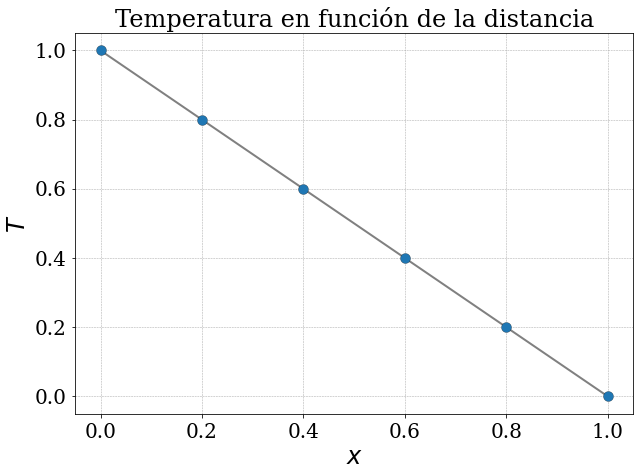

In [20]:
#1.C: Celda 3. El código que resuelve el problema y grafica la solución.

# Arreglo para almacenar la solucion 
# Vector de almacenamiento de Temperatura en los nodos interiores
T      = np. zeros (N +2)  # Vector de almacenamiento
T [0]  = TA                # Frontera izquierda
T[ -1] = TB                # Frontera derecha

# Lado derecho del sistema
# Vector de Ganancia o perdida de calor con fronteras incorporadas
b      = np. zeros (N)  # Vector de alamacenamiento
b [:]  = S / r          # Fuente o sumidero
b [0] += T [0]          # Condicion de frontera A
b[ -1] += T[ -1]        # Condicion de frontera B

# Construccion de la matriz
A = buildMatrix (N)  #Construccion de la malla de dominio

# Solucion del sistema lineal
T [1: N +1] = np. linalg . solve (A,b)

# Impresion y graficacion de la solucion
# Se grafica x vs T
print (T)
x = np. linspace (0, L, N +2)
plt.figure ( figsize =(10 ,7))
plt.plot (x, T, c='grey', lw =2.0)
plt.scatter (x, T, edgecolor ='k', zorder = 10)
plt.xlabel ('$x$ ')
plt.ylabel ('$T$ ')
plt.title('Temperatura en función de la distancia')
plt.grid ()
plt.show ()


# Transferencia de calor
**L=1.0[m] $\kappa$ =  1.0 [W/mK] , S = 1[J/m$^3$s]**

- ** Condiciones de Frontera tipo Dirichlet**
 1. TA = 1[K]
 2. TB = 0[K]

La transferencia de calor a traves de un cuerpo un cuerpo con longitud y conductividad térmica constante, en ausencia de ganancia o perdida de calor, sera de forma lineal entre sus fronteras

In [21]:
#2.A: Funcion def solExact(x, TA, TB, k, L, S):
def solExact (x, TA , TB , k, L, S):
    """
    Calculo de la solucion exacta

    x  = Distancia [m]
    TA = Temperatura en frontera Izquiera [K]
    TB = Temperatura en frontera Derecha [K]
    k  = conductividad Termica [W/m*K]
    L  = Longitud del sistema [m]
    S  = Ganancia o perdida de calor [J/m3*s]
    """
    return ((TB -TA )/L+(S /(2* k ))*(L-x ))* x+TA

#2.B: Función def solNum(L, N, k, S, A, b, T, etiqueta):
def solNum(L, N, k, S, A, b, T, etiqueta):
    """Calculo de la solucion numerica
    
    L = Longitud del sistema [m]
    N = Tamaño de la malla de dominio
    k = Conductividad Termica [W/m*K]
    S = Ganancia o perdida de calor [J/m3*s]
    A = Matriz de sistema lineal de ecuaciones
    b = Vector de de Ganancia o perdida de calor
    T = Vector de Temperatura
    etiqueta : L, k, S
    """
    h = L / (N +1)  # Longitud de celdas
    r = k / h **2   # Realación k/h2 (en este caso es constante)
    
    # Lado derecho del sistema
    b     = np.zeros (N)  # Vector de alamacenamiento
    b[:]  = S / r         # Fuente o sumidero
    b[0] += T[0]          # Condicion de frontera A
    b[-1] += T[-1]        # Condicion de frontera B
  
    # Solucion del sistema lineal
    T [1: N +1] = np.linalg.solve(A,b)

    # Impresion y graficacion de la solucion
    x = np.linspace (0, L, N +2)
  
    # Construccion de la etiqueta de cada grafica
    if etiqueta == 'L':
        etiqueta = '$L$ = {:3.2f}'.format(L)
    elif etiqueta == 'k':
        etiqueta = '$\kappa$ = {:3.2f}'.format(k)
    elif etiqueta == 'S':
        etiqueta ='$S$ = {:3.2f}'.format(S)
    
    # Se grafican los puntos de la solucion
    plt.scatter(x, T, edgecolor='k', s=50, zorder= 10, label=etiqueta)

#2.C: Función def plotSol(title, filename):
def plotSol(title, filename):
    plt.suptitle('Conduccion estacionaria',fontsize =24,y=0.94,va='center_baseline')
    plt.title(title, fontsize=20, color ='blue')
    plt.ylabel('$T$')
    plt.xlabel('$x$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize =12)
    plt.grid()
    plt.savefig(filename)
    plt.show()

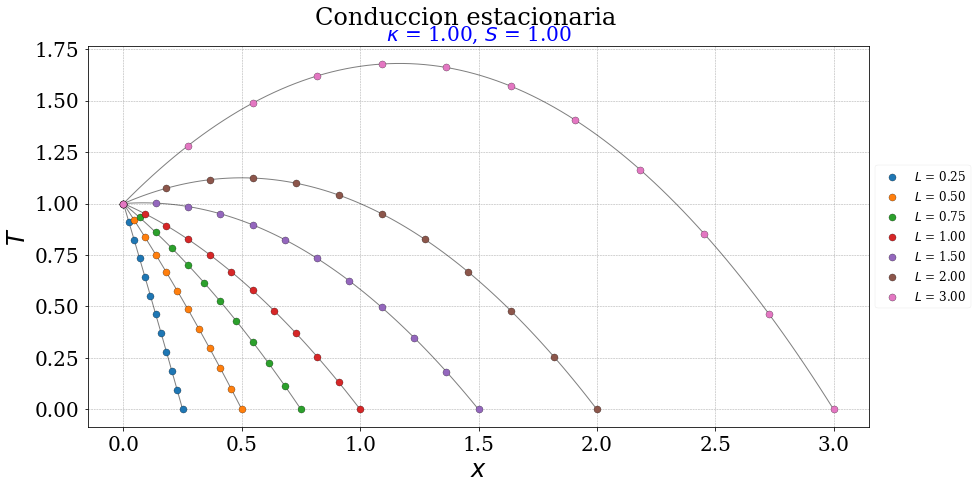

In [22]:
#3: Variando la longitud del dominio (L).

# Parametros fisicos
# Longitud del dominio (variaciones)
l = [0.25 , 0.5 , 0.75 , 1.0 , 1.5 , 2.0 , 3.0]

# Condiciones de frontera tipo Dirichlet 
TA = 1.0  # Temperatura frontera A [K]
TB = 0.0 # Temperatura frontera B [K]

k = 1.0  # Conductividad Termica [W/m*K] (Constante)  
S = 1.0  # Ganancia o perdida de calor [J/m3*s]

# Parametros nume ricos
N = 10  # Tamaño de la malla de dominio

# Arreglo para almacenar la solucion
T      = np. zeros (N +2) # Vector de almacenamiento (Temperatura)
T [0]  = TA   # Frontera izquierda (Temperatura)[k]
T[ -1] = TB   # Frontera derecha (Temperatura)[K]

# Construccion de la matriz
A = buildMatrix (N) #Construcción del sistema de ecuaciones

for L in l:
    solNum(L, N, k, S, A, b, T,'L')
    xe = np.linspace (0,L ,100)
    plt.plot(xe,solExact(xe,TA ,TB,k,L,S),'k-', lw =1.0 , alpha =0.5)
    
plotSol('$\kappa$ = {:3.2f}'. format (k)+', $S$ = {:3.2f}'. format (S),'VariacionLong.pdf')


# Variando la longitud del dominio L
**T(x) =((TB-TA)/L + (S/2$\kappa$)(L-x)) x + TA**

**$\kappa$ =  1.0 [W/mK] , S = 1[J/m$^3$s]**

La conductividad térmica es constante a lo largo del cuerpo, mientras que se gana calor de forma constante (Fuente)

Mientras mas pequeña es la longitud del cuerpo, su transferencia de calor sera casi de forma lineal, sin embargo
mientras mas grande es la longitud del mismo, su transferencia de calor crecera alrededor de la fuente y decrecera 
hacia la frontera

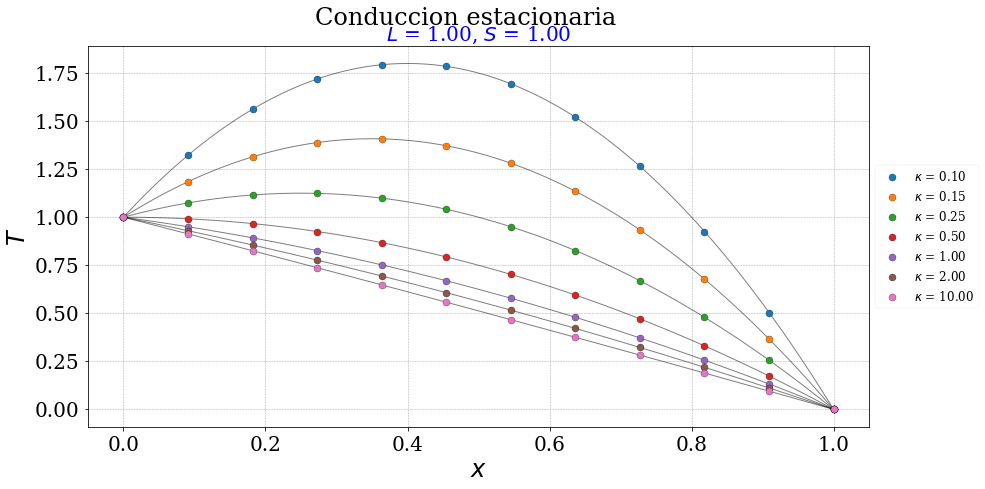

In [23]:
#4.A: Variando la conductividad térmica (k).
# Parametros fisicos

# Conductividad Termica [W/m*K] (variaciones)  
kv = [0.1, 0.15, 0.25, 0.5, 1.0, 2.0, 10]

# Condiciones de frontera tipo Dirichlet 
TA = 1.0  # Temperatura frontera A [K]
TB = 0.0 # Temperatura frontera B [K]

L = 1.0 # Longitud del dominio [m]
S = 1.0  # Ganancia o perdida de calor [J/m3*s]

# Parametros nume ricos
N = 10  # Tamaño de la malla de dominio

# Arreglo para almacenar la solucion
T      = np. zeros (N +2) # Vector de almacenamiento (Temperatura)
T [0]  = TA   # Frontera izquierda (Temperatura)[k]
T[ -1] = TB   # Frontera derecha (Temperatura)[K]

# Construccion de la matriz
A = buildMatrix (N) #Construcción del sistema de ecuaciones

for k in kv:
    solNum(L, N, k, S, A, b, T,'k')
    xe = np.linspace (0,L,100)
    plt.plot(xe,solExact(xe,TA ,TB,k,L,S),'k-', lw =1.0 , alpha =0.5)
    
plotSol('$L$ = {:3.2f}'.format(L)+', $S$ = {:3.2f}'.format(S),'VariacionKappa.pdf')

# Variando la conductividad térmica $\kappa$
**T(x) =((TB-TA)/L + (S/2$\kappa$)(L-x)) x + TA**

**L=  1.0 [m] , S = 1[J/m$^3$s]**

La longitud del cuerpo es constante, mientras que se gana calor de forma constante (Fuente)

Mientras mas pequeña es la conductividad termica la transferencia de calor crecera alrededor de la fuente y decrecera 
hacia la frontera; sin embargo, mientras mayor es la conductividad térmica, mas rapida sera la transferencia de calor, comportandose de manera lineal.

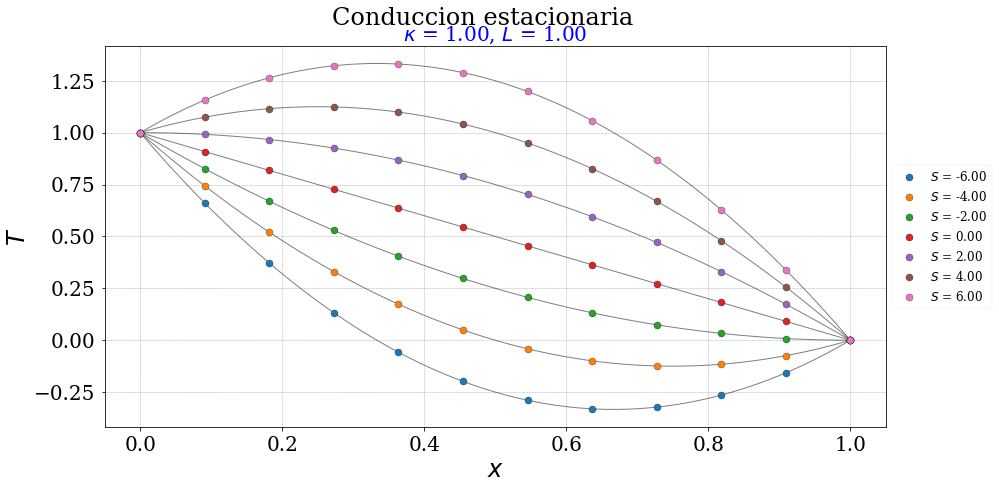

In [24]:
#4.B: Variando la fuente (S).
# Ganancia o perdida de calor [J/m3*s] (variaciones)
sv = [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0] 

# Condiciones de frontera tipo Dirichlet 
TA = 1.0  # Temperatura frontera A [K]
TB = 0.0 # Temperatura frontera B [K]

L = 1.0  # Longitud del dominio [m]
k = 1.0  # Conductividad Termica [W/m*K]


# Parametros nume ricos
N = 10  # Tamaño de la malla de dominio

# Arreglo para almacenar la solucion
T      = np. zeros (N +2) # Vector de almacenamiento (Temperatura)
T [0]  = TA   # Frontera izquierda (Temperatura)[k]
T[ -1] = TB   # Frontera derecha (Temperatura)[K]

# Construccion de la matriz
A = buildMatrix (N) #Construcción del sistema de ecuaciones

for S in sv:
    solNum(L, N, k, S, A, b, T,'S')
    xe = np.linspace (0,L,100)
    plt.plot(xe,solExact(xe,TA ,TB,k,L,S),'k-', lw =1.0 , alpha =0.5)
    
plotSol('$\kappa$ = {:3.2f}'.format(k)+', $L$ = {:3.2f}'.format(L),'VariacionS.pdf')

# Variando la fuente S
**T(x) =((TB-TA)/L + (S/2 𝜅 )(L-x)) x + TA**

**L= 1.0 [m] ,  $\kappa$= 1[W/mK]**

La longitud del cuerpo y su conductividad termica son constantes

La transferencia de calor crecera o decrecera alrededor de la fuente(S+) o Sumidero(-),respectivamente, y decrecera o aumentara, respectivamente,  hacia la frontera. Asimismo, cuando no existe una fuente, la transferencia de calor ocurrira de manera lineal de la frontera A a la B